In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=da02e673ead9e6fcdbd69b6b4b5de4e257128e86de078d262f43f0908c50ac3e
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [11]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale

**1.Travelling SalesMan Problem**

In [7]:
np.random.RandomState(10)
N_points = 40
N_neurons = N_points*2
t = np.linspace(0, np.pi*2, N_points)
x = np.cos(t)+(np.random.rand(N_points)-.5)*.3
y = np.sin(t)+(np.random.rand(N_points)-.5)*.3

som = MiniSom(1, N_neurons, 2, sigma=8, learning_rate=.4,
              neighborhood_function='gaussian', random_seed=0)
points = np.array([x,y]).T
som.random_weights_init(points)

/usr/local/lib/python3.10/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


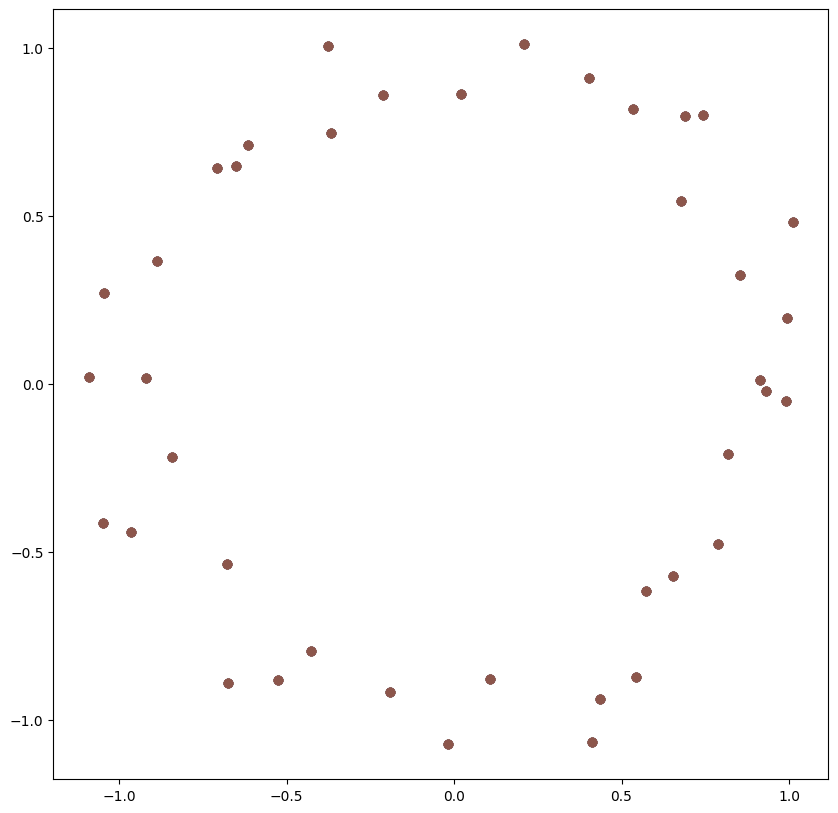

In [8]:
plt.figure(figsize=(10, 10))
for i, iterations in enumerate(range(5, 81, 5)):
    plt.scatter(x,y)

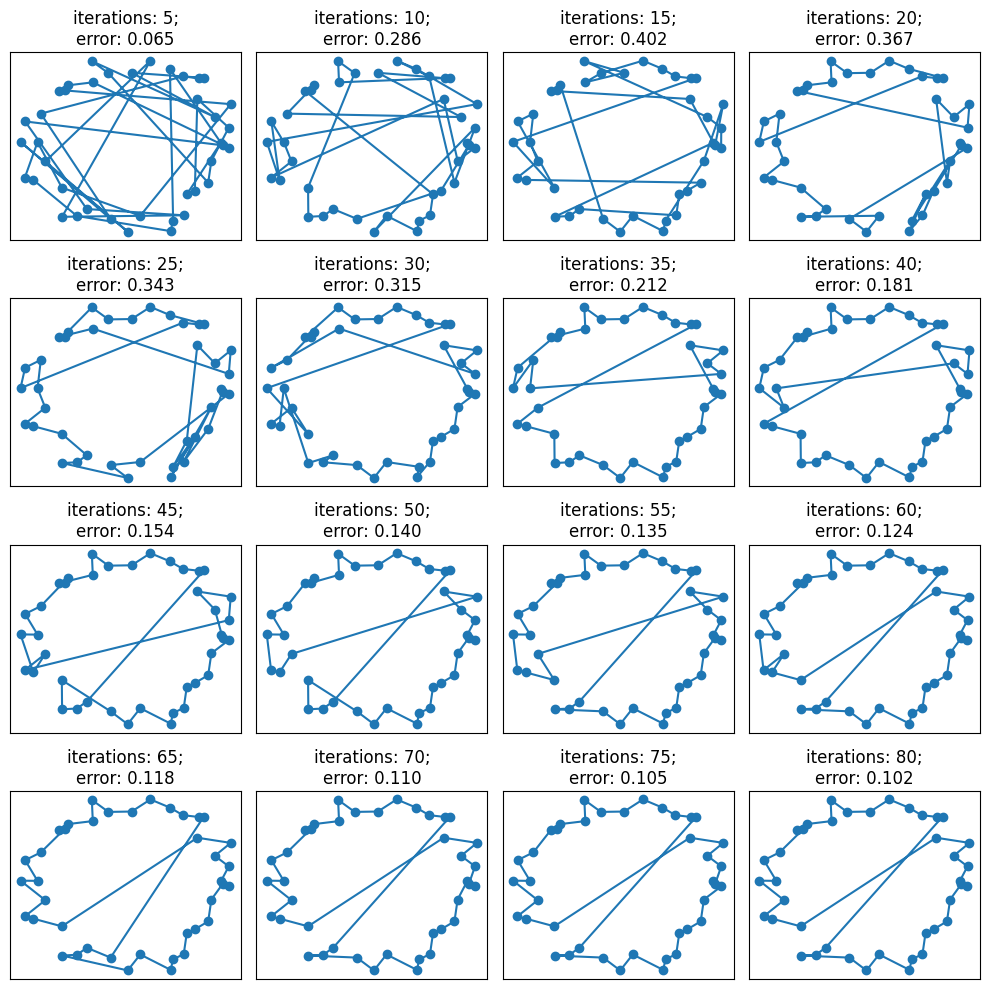

In [9]:
plt.figure(figsize=(10, 10))
for i, iterations in enumerate(range(5, 81, 5)):
    som.train(points, iterations, verbose=False, random_order=False)
    plt.subplot(4, 4, i+1)
    plt.scatter(x,y)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    plt.plot(points[visit_order][:,0], points[visit_order][:,1])
    plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations,
                                                        e=som.quantization_error(points)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

 **2.Outliers Detection**

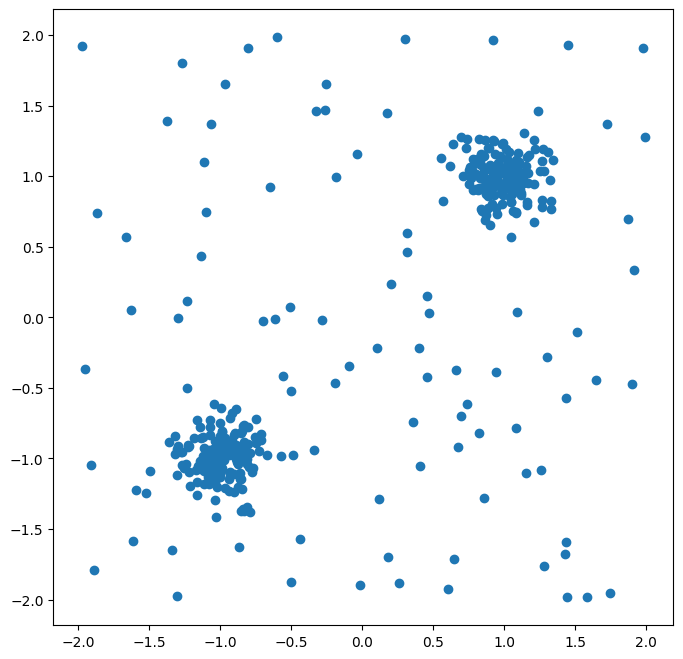

In [12]:
outliers_percentage = 0.35
inliers = 300
outliers = int(inliers * outliers_percentage)


data = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[.3, .3],
                  n_samples=inliers, random_state=0)[0]

data = scale(data)
data = np.concatenate([data,
                       (np.random.rand(outliers, 2)-.5)*4.])

plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.4630696928211481
Error treshold: 0.341611234596706


/usr/local/lib/python3.10/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


Text(0, 0.5, 'frequency')

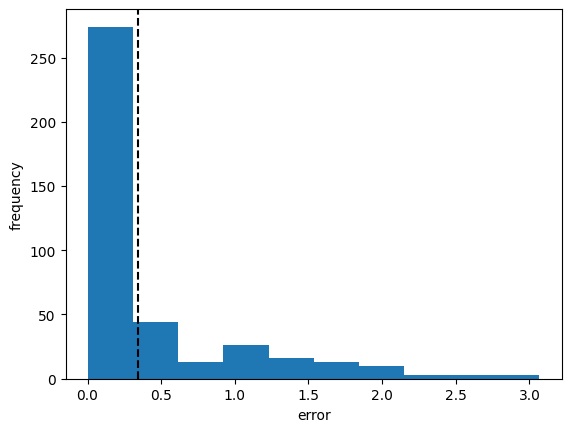

In [13]:
som = MiniSom(2, 1, data.shape[1], sigma=1, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)


som.train(data, 100, random_order=False, verbose=True)  # random training

quantization_errors = np.linalg.norm(som.quantization(data) - data, axis=1)
error_treshold = np.percentile(quantization_errors,
                               100*(1-outliers_percentage)+5)

print('Error treshold:', error_treshold)

is_outlier = quantization_errors > error_treshold

plt.hist(quantization_errors)
plt.axvline(error_treshold, color='k', linestyle='--')
plt.xlabel('error')
plt.ylabel('frequency')

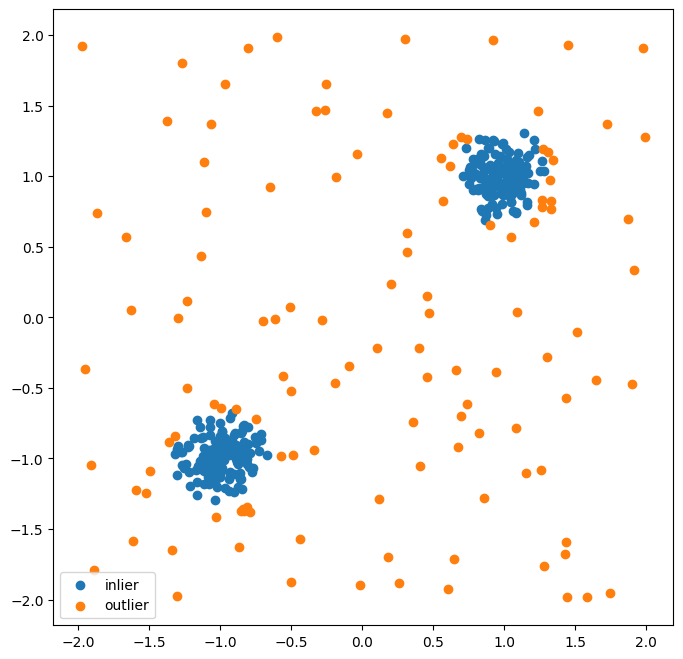

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(data[~is_outlier, 0], data[~is_outlier, 1],
            label='inlier')
plt.scatter(data[is_outlier, 0], data[is_outlier, 1],
            label='outlier')
plt.legend()
#plt.savefig('resulting_images/som_outliers_detection.png')
plt.show()

In [15]:
from sklearn.datasets import make_circles
data = make_circles(noise=.1, n_samples=inliers, random_state=0)[0]
data = scale(data)
data = np.concatenate([data,
                       (np.random.rand(outliers, 2)-.5)*4.])


som = MiniSom(5, 5, data.shape[1], sigma=1, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)


som.train_batch(data, 100, verbose=True)
quantization_errors = np.linalg.norm(som.quantization(data) - data, axis=1)
error_treshold = np.percentile(quantization_errors,
                               100*(1-outliers_percentage)+5)
is_outlier = quantization_errors > error_treshold

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.3614792352000773


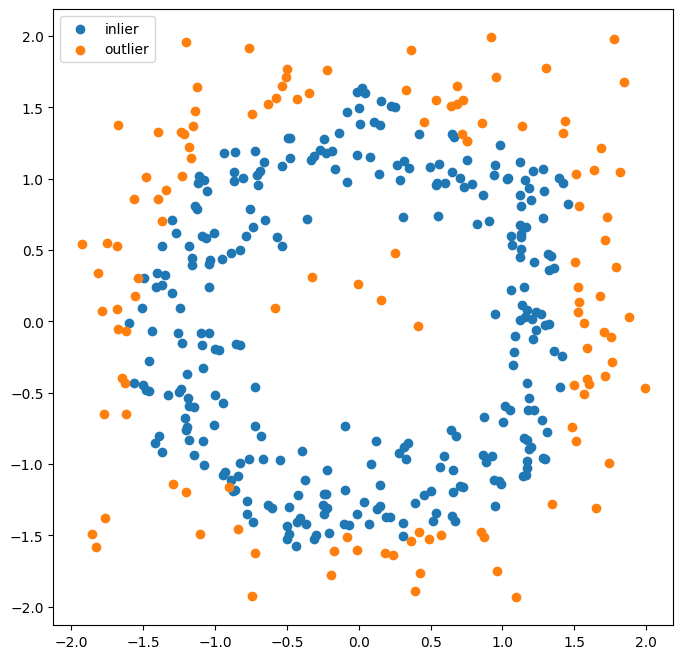

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(data[~is_outlier, 0], data[~is_outlier, 1],
            label='inlier')
plt.scatter(data[is_outlier, 0], data[is_outlier, 1],
            label='outlier')

plt.legend()
#plt.savefig('resulting_images/som_outliers_detection_circle.png')
plt.show()